In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# Assuming the downloaded file is named 'titanic.csv'
df = pd.read_csv('titanic.csv')


# See the first 5 rows of the dataset
print("First 5 rows:")
print(df.head())

# Get a concise summary of the dataframe (columns, data types, non-null counts)
print("\nDataset Info:")
df.info()

# Get statistical summary for numerical columns (count, mean, std, etc.)
print("\nStatistical Summary:")
print(df.describe())

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [3]:
# --- Handling Missing Values

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"\nMissing 'Age' values filled with median: {median_age}")

# For 'Cabin': This column has too many missing values. It's often best to drop it.
df.drop('Cabin', axis=1, inplace=True)
print("Dropped 'Cabin' column due to too many missing values.")

# Verify that the nulls are handled
print("\nNull values after cleaning:")
print(df.isnull().sum())


Missing 'Age' values filled with median: 28.0
Dropped 'Cabin' column due to too many missing values.

Null values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [4]:
# --- Encoding Categorical Features ---

# For 'Sex': Since it's binary ('male'/'female'), we can use a simple map or LabelEncoder.
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
print("\nEncoded 'Sex' column.")

# For 'Embarked': It has 3 categories. We use One-Hot Encoding.
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print("One-Hot Encoded 'Embarked' column.")

# We can also drop columns that are not useful for prediction, like 'Name' and 'Ticket'.
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

print("\nData after encoding and dropping irrelevant columns:")
print(df.head())


Encoded 'Sex' column.
One-Hot Encoded 'Embarked' column.

Data after encoding and dropping irrelevant columns:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


In [5]:
from sklearn.preprocessing import StandardScaler

# --- Feature Scaling ---

scaler = StandardScaler()
numerical_cols = ['Age', 'Fare'] # Specify columns to scale

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData after standardizing 'Age' and 'Fare':")
print(df.head())


Data after standardizing 'Age' and 'Fare':
   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    0 -0.565736      1      0 -0.502445   
1            2         1       1    1  0.663861      1      0  0.786845   
2            3         1       3    1 -0.258337      0      0 -0.488854   
3            4         1       1    1  0.433312      1      0  0.420730   
4            5         0       3    0  0.433312      0      0 -0.486337   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


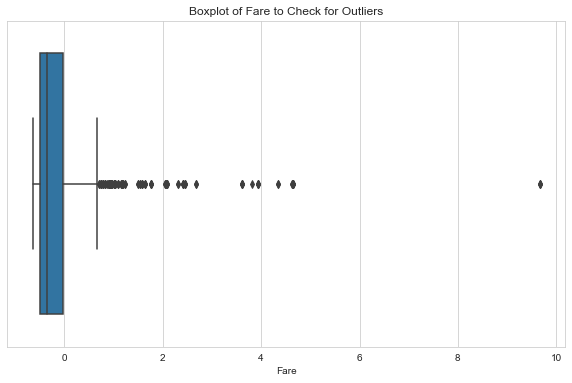


Original number of rows: 891
Number of rows after removing Fare outliers: 775


In [6]:
# --- Handling Outliers ---

# 1. Visualize outliers in the 'Fare' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare to Check for Outliers')
plt.show()

# 2. Remove outliers using the IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to keep only the values within the bounds
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print(f"\nOriginal number of rows: {len(df)}")
print(f"Number of rows after removing Fare outliers: {len(df_no_outliers)}")